# Bombardeos de los Aliados,
### y de cómo entender mejor la Segunda Guerra Mundial a través de ellos.
By Fernando Bielza González

## >Importa librerías necesarias

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium

import copy #<--- todo
import random
import statistics #<--- Para las medianas


## >Obtener el DataFrame THOR y una copia (DataFrame General)

In [2]:
df = pd.read_csv('Datasets/thor_wwii.csv')
df

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
0,03/30/1941,ETO,GREAT BRITAIN,RAF,84 SQDN,BLENHEIM,10.0,NaN,NaN,NaN,NaN,ALBANIA,ELBASAN,41.100000,20.070000,0.0,0.0,0.0,0.0
1,11/24/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,DURAZZO,41.320000,19.450000,0.0,0.0,0.0,0.0
2,12/04/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,TEPELENE,40.300000,20.020000,0.0,0.0,0.0,0.0
3,12/31/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
4,01/06/1941,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,08/01/1945,PTO,USA,20 AF,73 BW,B29,99.0,NaN,NaN,NaN,NaN,JAPAN,TOYAMA,36.700000,137.216667,0.0,999.0,0.0,999.0
178277,07/22/1942,MTO,GREAT BRITAIN,RAF,NaN,BLENHEIM,NaN,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178278,08/17/1940,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178279,08/06/1945,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,HIROSHIMA,34.400000,132.466667,15000.0,0.0,0.0,15000.0


In [3]:
df_total=copy.copy(df)

## >Arreglar DataFrame General

### +Arreglar datos NaN de interés

In [4]:
df_total["THEATER"]=df_total["THEATER"].fillna("UNKNOWN THEATER")
df_total["COUNTRY_FLYING_MISSION"]=df_total["COUNTRY_FLYING_MISSION"].fillna("UNKNOWN COUNTRY")
df_total["NAF"]=df_total["NAF"].fillna("UNKNOWN NAF")
df_total["UNIT_ID"]=df_total["UNIT_ID"].fillna("UNKNOWN UNIT")
df_total["AIRCRAFT_NAME"]=df_total["AIRCRAFT_NAME"].fillna("UNKNOWN NAME")

df_total["AC_ATTACKING"]=df_total["AC_ATTACKING"].fillna(0.0)

df_total["TGT_COUNTRY"]=df_total["TGT_COUNTRY"].fillna("UNKNOWN COUNTRY")
df_total["TGT_LOCATION"]=df_total["TGT_LOCATION"].fillna("UNKNOWN LOCATION")      #<---¿UNIDENTIFIED?


df_total

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
0,03/30/1941,ETO,GREAT BRITAIN,RAF,84 SQDN,BLENHEIM,10.0,NaN,NaN,NaN,NaN,ALBANIA,ELBASAN,41.100000,20.070000,0.0,0.0,0.0,0.0
1,11/24/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,DURAZZO,41.320000,19.450000,0.0,0.0,0.0,0.0
2,12/04/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,TEPELENE,40.300000,20.020000,0.0,0.0,0.0,0.0
3,12/31/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
4,01/06/1941,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,08/01/1945,PTO,USA,20 AF,73 BW,B29,99.0,NaN,NaN,NaN,NaN,JAPAN,TOYAMA,36.700000,137.216667,0.0,999.0,0.0,999.0
178277,07/22/1942,MTO,GREAT BRITAIN,RAF,UNKNOWN UNIT,BLENHEIM,0.0,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178278,08/17/1940,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178279,08/06/1945,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,HIROSHIMA,34.400000,132.466667,15000.0,0.0,0.0,15000.0


### +Arreglar ausencia de coordenadas en las operaciones sobre Madagascar

In [5]:
#Obtener el índice de todas las filas cuyo país registrado sea Madagascar:
x=df_total[df_total["TGT_COUNTRY"]=="MADAGASCAR"]
lista_Madagascar=x.index.tolist()

#Obtener un nuevo DataFrame con las filas de Madagascar y añadirle las coordenadas de forma manual:
a=df_total[df_total["TGT_LOCATION"]=="DIEGO SUAREZ BAY"]
a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)

b=df_total[df_total["TGT_LOCATION"]=="SW OF DIEGO SUAREZ BAY"]
b['TGT_LATITUDE'] = b['TGT_LATITUDE'].fillna(-12.1350)
b['TGT_LONGITUDE'] = b['TGT_LONGITUDE'].fillna(49.1734)

c=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRDGE TO TANANARIVE"]
c['TGT_LATITUDE'] = c['TGT_LATITUDE'].fillna(-16.9380)
c['TGT_LONGITUDE'] = c['TGT_LONGITUDE'].fillna(46.9512)

d=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRIDGE"]
d['TGT_LATITUDE'] = d['TGT_LATITUDE'].fillna(-16.9380)
d['TGT_LONGITUDE'] = d['TGT_LONGITUDE'].fillna(46.9512)

e=df_total[df_total["TGT_LOCATION"]=="3MI N OF BEHENJY ON TANANARIVE-ANTISIRABE RD"]
e['TGT_LATITUDE'] = e['TGT_LATITUDE'].fillna(-16.9380)
e['TGT_LONGITUDE'] = e['TGT_LONGITUDE'].fillna(46.9512)

f=df_total[df_total["TGT_LOCATION"]=="IHOSY"]
f['TGT_LATITUDE'] = f['TGT_LATITUDE'].fillna(-22.2400)
f['TGT_LONGITUDE'] = f['TGT_LONGITUDE'].fillna(46.0701)

g=df_total[df_total["TGT_LOCATION"]=="1 MI SW OF IHOSY"]
g['TGT_LATITUDE'] = g['TGT_LATITUDE'].fillna(-22.2400)
g['TGT_LONGITUDE'] = g['TGT_LONGITUDE'].fillna(46.0701)

h=df_total[df_total["TGT_LOCATION"]=="HILLS S OF AMBOSITRA"]
h['TGT_LATITUDE'] = h['TGT_LATITUDE'].fillna(-20.3258) 
h['TGT_LONGITUDE'] = h['TGT_LONGITUDE'].fillna(47.1521)

i=df_total[df_total["TGT_LOCATION"]=="N OF ALAKAMISY"]
i['TGT_LATITUDE'] = i['TGT_LATITUDE'].fillna(-19.53)  
i['TGT_LONGITUDE'] = i['TGT_LONGITUDE'].fillna(46.54)

j=df_total[df_total["TGT_LOCATION"]=="ARRACHART AIRFIELD"]
j['TGT_LATITUDE'] = j['TGT_LATITUDE'].fillna(-12.2057)
j['TGT_LONGITUDE'] = j['TGT_LONGITUDE'].fillna(49.1730)

k=df_total[df_total["TGT_LOCATION"]=="COL DE BONNE NOUVELLE"]
k['TGT_LATITUDE'] = k['TGT_LATITUDE'].fillna(-18.5619)
k['TGT_LONGITUDE'] = k['TGT_LONGITUDE'].fillna(47.3117)

#Este último caso no se trata de coordenadas ausentes, sino de una erróena asignación de país:
l=df_total[df_total["TGT_LOCATION"]=="BALDENEY SEE"]
l["TGT_COUNTRY"] = l["TGT_COUNTRY"].replace(["MADAGASCAR"], "GERMANY")

df_total_Madagascar = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l])

#Expulsar del DataFrame General todas las operaciones sobre Madagascar:
for i in lista_Madagascar:
    df_total=df_total.drop([i])

#Concatenar el DataFrame General con el DataFrame de las operaciones sobre Madagascar (ya con las coordenadas añadidas):
df_total=pd.concat([df_total, df_total_Madagascar])

C:\Users\ferbi\AppData\Local\Temp/ipykernel_64568/1506459216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
C:\Users\ferbi\AppData\Local\Temp/ipykernel_64568/1506459216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)
C:\Users\ferbi\AppData\Local\Temp/ipykernel_64568/1506459216.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### +Arreglar cronología y eliminar fechas sobrantes (todas las posteriores al 2 de septiembre de 1945)

In [7]:
#Obtener DataFrame General ordenado cronológicamente:
df_total["MSNDATE"]=pd.to_datetime(df_total["MSNDATE"])
df_total=df_total.sort_values(by='MSNDATE')

#Obtener DataFrame con las fechas posteriores al 2 de septiembre de 1945 de forma manual:
df_total_END=df_total[-53:]

#Eliminar fechas sobrantes del DataFram General:
df_total=df_total[:-54]
#(hay 178.228 (-53) operaciones)

df_total

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
3990,1939-09-03,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,10.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""HAMBURG, BREMEN, RUHR""",53.563056,9.967222,0.0,0.0,0.0,0.0
3991,1939-09-04,ETO,GREAT BRITAIN,RAF,139 SQ,BLENHEIM,10.0,WYTON,ENGLAND,52.35694,-0.10777,GERMANY,WILHELMSHAVEN,53.500000,8.050000,0.0,0.0,0.0,0.0
3994,1939-09-04,ETO,GREAT BRITAIN,RAF,9 & 149 SQ,WELLINGTON,9.0,RAF HONINGTON,ENGLAND,52.34277,0.77305,GERMANY,BRUNSBUTTEL,53.895040,9.104836,0.0,0.0,0.0,0.0
4004,1939-09-04,ETO,GREAT BRITAIN,RAF,51 & 58 SQ,WHITLEY,6.0,LECONFIELD,ENGLAND,53.87750,-0.43555,GERMANY,RUHR,52.366667,9.716667,0.0,0.0,0.0,0.0
4014,1939-09-05,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,4.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""MAINZ, DARMSTADT, MANNHEIM, FRANKFURT""",48.766667,9.150000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56554,1945-08-14,CBI,USA,5 AF,41 FS,P51,10.0,NaN,NaN,NaN,NaN,CHINA,32 10 N 130 0,32.166667,130.033333,3.0,0.0,0.0,3.0
118520,1945-08-14,PTO,USA,20 AF,504 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN MINING,NANAO,37.050000,136.966667,0.0,21.0,0.0,21.0
150858,1945-08-14,PTO,USA,20 AF,504 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN MINING,MAIZURU Z,35.450000,135.333333,0.0,41.0,0.0,41.0
176822,1945-08-14,PTO,USA,20 AF,314 BW,B29,71.0,NaN,NaN,NaN,NaN,JAPAN,KUMAGAYA,36.133333,139.400000,12.0,274.0,0.0,286.0


### +Arreglar índice, cambiándolo por las fechas

In [8]:
#df_total.set_index('MSNDATE',inplace=True)

## >Funiones para los DataFrames

### +Función para localizar por días [1]

In [9]:
def fun_fechas (df_total_dias, *fechas):
    #df_total_dias=df_total_dias.set_index('MSNDATE')
    lista=[]
    for i in fechas:
        lista.append(i)
    if len(lista) < 2:
        lista.append(lista[0])
    return df_total_dias[lista[0]:lista[1]]

### +Función para hacer histogramas [1]

In [10]:
#Función para cronología [muestra solo Fecha]:
"""
def df_crono (df_total_year, style=0):
    df_crono=df_total_year.drop(['COUNTRY_FLYING_MISSION', 'TGT_COUNTRY', 'TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME', 'TGT_LATITUDE', 'TGT_LONGITUDE', 'TOTAL_TONS'], axis=1)
    plt.style.use(estilo (style))
    return df_crono.groupby([df_crono["MSNDATE"].dt.year, df_crono["MSNDATE"].dt.month]).count().plot(kind="bar")
"""

'\ndef df_crono (df_total_year, style=0):\n    df_crono=df_total_year.drop([\'COUNTRY_FLYING_MISSION\', \'TGT_COUNTRY\', \'TGT_LOCATION\', \'THEATER\', \'TAKEOFF_BASE\', \'TAKEOFF_COUNTRY\', \'TAKEOFF_LATITUDE\',\n                      \'TAKEOFF_LONGITUDE\', \'TONS_HE\', \'TONS_IC\', \'TONS_FRAG\', \'AC_ATTACKING\', \'NAF\', \'UNIT_ID\', \'AIRCRAFT_NAME\', \'TGT_LATITUDE\', \'TGT_LONGITUDE\', \'TOTAL_TONS\'], axis=1)\n    plt.style.use(estilo (style))\n    return df_crono.groupby([df_crono["MSNDATE"].dt.year, df_crono["MSNDATE"].dt.month]).count().plot(kind="bar")\n'

In [11]:
#Función para cronología [muestra solo Fecha]:
def df_crono (df_total_year, x=5, y=5, titulo="Bombardeos Aliados en la Segunda Guerra Mundial", style=0, kind=1):
    df_crono=df_total_year.drop(['COUNTRY_FLYING_MISSION', 'TGT_COUNTRY', 'TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME', 'TGT_LATITUDE', 'TGT_LONGITUDE', 'TOTAL_TONS'], axis=1)
    lista_crono=[]
    #lista_99=[]
    #numero_99=0
    for (index, row) in df_crono.iterrows():
        fecha=index
        #numero_99=numero_99+1
        lista_crono.append(fecha)
        #lista_99.append(numero_99)
    df_fechas = pd.Series(lista_crono, index = lista_crono)
    titulo_1=limpiar_horas(lista_crono[0])
    titulo_2=limpiar_horas(lista_crono[-1])
    
    plt.style.use(estilo (style))
    return df_fechas.groupby([df_fechas.dt.year, df_fechas.dt.month]).count().plot(kind=(tipo(kind)), title=titulo, xlabel=f"De {titulo_1} a {titulo_2}", ylabel="Nº Operaciones", figsize=(x,y))

### +Función para geolocalizar [1]

#### · Función de geolocalización

In [12]:
#Función para geolocalizar [muestra Fecha, País Atacante, Localidad Atacada, Latitud, Longitud y Daño Total]:   <---(hay 169.490 (-8.791) operaciones)
def fun_gps(df_total_year, x=25, y=20, z=2.4, tons=0, tile=0, reverse=False, teatro="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=4.8
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    if teatro != "0":
        x, y, z=continente(teatro)
    r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons:
            #fecha=limpiar_horas(row.loc["MSNDATE"])
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            atacante="Modelo: "+row.loc['AIRCRAFT_NAME']+" / "+"Unidades: "+str(int(row.loc['AC_ATTACKING']))+" / "+"Grupo: "+row.loc['NAF']+" ("+row.loc['COUNTRY_FLYING_MISSION']+")"
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.05, 0.05), 6))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.05, 0.05), 6))
            if reverse is True:
                referencia_x=atacante
                atacante=referencia
                referencia=referencia_x
            folium.Marker(location = [m, n], popup = atacante, tooltip = referencia, icon=folium.Icon(color=x, icon=y),).add_to(r)
        else:
            pass
    return r

#### · Funciones que ayudan a la función de geolocalización

In [13]:
#Función para colorear los iconos de la función de geolocalizar:
def colorear (color):
    """
-blanco                                   - white                                          - 0
-verde claro                              - lightgreen                                     - 1-4
-color carne                              - beige                                          - 5-9
-rojo claro                               - lightred                                       - 10-16
-azul claro                               - lightblue                                      - 17-23
-rosa                                     - pink                                           - 24-29


-gris claro                               - lightgray                                      - 30-49
-verde                                    - green                                          - 50-79
-verde oscuro (marrón)                    - darkgreen                                      - 80-99

-rojo oscuro                              - darkred                                        - 100-199
-rojo                                     - red                                            - 200-299
-naranja                                  - orange                                         - 300-399
-púrpura                                  - purple                                         - 400-499
-azul                                     - blue                                           - 500-599

-púrpura oscuro                           - darkpurple                                     - 600-699
-azul oscuro                              - darkblue                                       - 700-799
-gris oscuro                              - cadetblue                                      - 800-899
-gris                                     - gray                                           - 900-999
-negro                                    - black                                          - 1.000
    """
    if color >= 1000:
        return "black"
    elif color >= 900:
        return "gray"
    elif color >= 800:
        return "cadetblue"
    elif color >= 700:
        return "darkblue"
    elif color >= 600:
        return "darkpurple"
    elif color >= 500:
        return "blue"
    elif color >= 400:
        return "purple"
    elif color >= 300:
        return "orange"
    elif color >= 200:
        return "red"
    elif color >= 100:
        return "darkred"
    elif color >= 80:
        return "darkgreen"
    elif color >= 50:
        return "green"
    elif color >= 30:
        return "lightgray"
    elif color >= 24:
        return "pink"
    elif color >= 17:
        return "lightblue"
    elif color >= 10:
        return "lightred"
    elif color >= 5:
        return "beige"
    elif color > 0:
        return "lightgreen"
    else:
        return "white"


#Función para establecer el símbolo de los iconos de la función de geolocalizar:
def simbolo (pais):
    if pais == "USA":
        return "star"
    elif pais == "GREAT BRITAIN":
        return "gbp"
    elif pais == "NEW ZEALAND":
        return "leaf"
    elif pais == "AUSTRALIA":
        return "font"
    elif pais == "SOUTH AFRICA":
        return "certificate"
    else:
        return "question-sign"


#Función para eliminar tanto las horas, como los minutos, como los segundos del marcador de los iconos:
def limpiar_horas (fecha):
    s=str(fecha)
    i="00:"
    s = s.replace(i,"")
    i="00"
    s = s.replace(i,"")
    return s


#Función para ubicar el mapa según el Teatro de operaciones que deseemos:
def continente (theater):
    if theater.upper() == "ETO" or theater.upper() == "EUROPA":
        x=19
        y=52
        z=4.8
    elif theater.upper() == "PTO" or theater.upper() == "PACIFICO" or theater.upper() == "PACÍFICO":
        x=150
        y=25
        z=4.3
    elif theater.upper() == "MTO" or theater.upper() == "MEDITERRANEO" or theater.upper() == "MEDITERRÁNEO":
        x=16
        y=40
        z=5.48
    elif theater.upper() == "CBI" or theater.upper() == "ORIENTE" or theater.upper() == "PROXIMO ORIENTE" or theater.upper() == "PRÓXIMO ORIENTE":
        x=117
        y=27
        z=4.5
    elif theater.upper() == "EAST AFRICA" or theater.upper() == "AFRICA" or theater.upper() == "ÁFRICA" or theater.upper() == "AFRICA ORIENTAL" or theater.upper() == "ÁFRICA ORIENTAL":
        x=43
        y=10
        z=6
    elif theater.upper() == "MADAGASCAR":
        x=48
        y=-19
        z=6
    else:
        x=25
        y=20
        z=2.4
    return x, y, z

### +Función para Modelos de Avión más frecuentes [1]

In [14]:
#Función para obtener los Modelos de Avión más frecuentes [muestra solo Modelo de Avión]:
def fun_modelos_avion (df_total_year, x=8, y=8, top=0, circulo=False, style=0):
    df_total_aviones=df_total_year["AIRCRAFT_NAME"].value_counts()
    plt.style.use(estilo (style))
    if top !=0:
        df_total_aviones_less= df_total_aviones[(top):]
        c=0
        for i in df_total_aviones_less:
            c=i+c
        df_total_aviones_less=pd.Series([c],index=[f"Resto [{len(df_total_aviones_less.index)}]"])
        df_total_aviones_max= df_total_aviones[:(top)]
        df_total_aviones=pd.concat([df_total_aviones_max, df_total_aviones_less])
    plt.figure(figsize=(x,y))
    plt.pie(df_total_aviones.values, labels=df_total_aviones.index, autopct='%1.2f%%')
    p=plt.gcf()
    if circulo is True:
        my_circle=plt.Circle((0,0), 0.7, color="w")
        p.gca().add_artist(my_circle)
    return plt.show()

### +Función para información del Modelo de Avión más frecuentes [1]

In [15]:
def fun_uso_avion (df_total_year, top=100, low=0, tons=0, comparacion=False):
    c=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    c=c["AIRCRAFT_NAME"].value_counts()
    lista=[]
    lista_2=[]
    m=c.index
    for i in m:
        lista.append(i)
    lista=lista[(low):(top)]
    if "UNKNOWN NAME" in lista:
            lista.remove("UNKNOWN NAME")
    for i in lista:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        for j in df_avion["TOTAL_TONS"]:
            lista_2.append(j)
        pais=df_avion["COUNTRY_FLYING_MISSION"].sort_values()
        destruccion=sum(df_avion["TOTAL_TONS"])
        if comparacion == True:
            r= f"(unas {round((destruccion/20000), 3)} nagasakis)"
        else:
            r=""
        print("Nombre del Modelo:", i)
        print("·Pais más común:", (pais.mode())[0])
        print("·Número de Bombardeos:", len(df_avion))
        print("·Destrucción Total:", round(destruccion, 3), r)
        print("·Media de Destrucción Total:", round((destruccion/len(df_avion)), 3))
        print("·Mediana de Destrucción Total:", statistics.median(lista_2), "\n")

### +Funciones para ver resultado por País Atacante [1]

#### · Función para ver los resultados de Inglaterra

In [16]:
#Función para ver únicamente las operaciones británicas:
def df_total_inglaterra (df_total_year):
    df_total_inglaterra=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]
    return df_total_inglaterra

#### · Función para ver los resultados de Estados Unidos

In [17]:
#Función para ver únicamente las operaciones norteamericanas:
def df_total_usa (df_total_year):
    df_total_usa=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="USA"]
    return df_total_usa

#### · Función para ver los resultados de Nueva Zelanda

In [18]:
#Función para ver únicamente las operaciones norteamericanas:
def df_total_nueva_zelanda (df_total_year):
    df_total_nueva_zelanda=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="NEW ZEALAND"]
    return df_total_nueva_zelanda

#### · Función para ver los resultados de Australia

In [19]:
#Función para ver únicamente las operaciones norteamericanas:
def df_total_australia (df_total_year):
    df_total_australia=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="AUSTRALIA"]
    return df_total_australia

#### · Función para ver los resultados de Sudáfrica

In [20]:
#Función para ver únicamente las operaciones norteamericanas:
def df_total_sudafrica (df_total_year):
    df_total_sudafrica=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="SOUTH AFRICA"]
    return df_total_sudafrica

#### · Función para ver los resultados de País Desconocido

In [21]:
def df_total_desconocidos (df_total_year):
    df_total_desconocidos=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="UNKNOWN COUNTRY"]
    return df_total_desconocidos

#### · Función para ver los resultados de Inglaterra y USA

In [22]:
#Función para ver únicamente las operaciones de Inglaterra y USA:
def df_total_aliados_top (df_total_year):
    df_total_aliados_top=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="NEW ZEALAND"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="AUSTRALIA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="SOUTH AFRICA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados_top

#### · Función para ver los resultados de Nueva Zelanda, Australia y Sudáfrica

In [23]:
#Función para ver únicamente las operaciones de Nueva Zelanda, Australia y Sudáfrica:
def df_total_aliados (df_total_year):
    df_total_aliados=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="USA"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="GREAT BRITAIN"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados

### +Funciones para ver resultados por Lugar Atacado [1]

#### · Función para ver los resultados en Europa

In [24]:
def fun_total_europa (df_total_year):
    df_total_europa=df_total_year[df_total_year["THEATER"]=="ETO"]
    return df_total_europa

#### · Función para ver los resultados en Pacífico

In [25]:
def fun_total_pacifico (df_total_year):
    df_total_pacifico=df_total_year[df_total_year["THEATER"]=="PTO"]
    return df_total_pacifico

#### · Función para ver los resultados en Mediterráneo

In [26]:
def fun_total_mediterraneo (df_total_year):
    df_total_mediterraneo=df_total_year[df_total_year["THEATER"]=="MTO"]
    return df_total_mediterraneo

#### · Función para ver los resultados en Extremo Oriente

In [27]:
def fun_total_oriente (df_total_year):
    df_total_oriente=df_total_year[df_total_year["THEATER"]=="CBI"]
    return df_total_oriente

#### · Función para ver los resultados en África Oriental

In [28]:
def fun_total_africa (df_total_year):
    df_total_africa=df_total_year[df_total_year["THEATER"]=="EAST AFRICA"]
    return df_total_africa

#### · Función para ver los resultados en Madagascar

In [29]:
def fun_total_madagascar (df_total_year):
    df_total_madagascar=df_total_year[df_total_year["THEATER"]=="MADAGASCAR"]
    return df_total_madagascar

#### · Función para ver los resultados en Lugares No Identificados

In [30]:
def fun_total_desconocido (df_total_year):
    df_total_desconocido=df_total_year[df_total_year["THEATER"]=="UNKNOWN THEATER"]
    return df_total_desconocido

#### · Función para ver los resultados de un País Atacado en concreto

In [31]:
def fun_total_pais (df_total_year, pais):
    pais=pais.upper()
    df_total_pais=df_total_year[df_total_year["TGT_COUNTRY"]==pais]
    return df_total_pais

#### · Función para ver los resultados de un Lugar Atacado en concreto

In [32]:
def fun_total_lugar (df_total_year, lugar):
    lugar=lugar.upper()
    df_total_lugar=df_total_year[df_total_year["TGT_LOCATION"]==lugar]
    return df_total_lugar

### +Funciones para establecer el estilo y el tipo visual deseados [1]

In [33]:
def estilo (style):
    style=int(style)
    estilos=("default", "classic", "bmh", "dark_background", "fast", "fivethirtyeight", "ggplot", "grayscale", "seaborn", "seaborn-bright", "seaborn-colorblind",
         "seaborn-dark-palette", "seaborn-darkgrid", "seaborn-deep", "seaborn-muted", "seaborn-notebook", "seaborn-paper", "seaborn-pastel", "seaborn-poster", "seaborn-talk", 
         "seaborn-ticks", "seaborn-white", "seaborn-whitegrid", "tableau-colorblind10")
    return estilos[style]

def tipo (kind):
    kind=int(kind)
    tipos=("line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin")
    return tipos[kind]

def mapa (tile):
    tile=int(tile)
    mosaicos=("OpenStreetMap", "Stamen Toner", "Stamen Terrain")
    return mosaicos[tile]

## ¿WHAT?

In [34]:
df_total.index

Int64Index([  3990,   3991,   3994,   4004,   4014,   3999,   3986,   4048,
              4010,   4015,
            ...
            176410,  71596,  64121,  64124,  64126,  56554, 118520, 150858,
            176822, 117440],
           dtype='int64', length=178227)

In [35]:
#df_gps(df_total_45, x=117, y=27, z=4.5, tons=100)

In [36]:
#df_total.set_index('MSNDATE',inplace=True)

In [37]:
#df_total_40["TOTAL_TONS"]

In [38]:
reqd_Index = list(np.where(df_total["TGT_COUNTRY"] == "MADAGASCAR"))#<---Para obtener el índice
print(reqd_Index)

[array([18915, 18920, 18929, 18930, 18940, 18958, 18967, 18979, 21198,
       21335, 21336, 21337, 21340, 21393, 21543, 21549, 21554, 21570,
       21582, 21608, 21650, 21727, 21742, 21743, 21810, 21812],
      dtype=int64)]


In [39]:
reqd_index = df_total.query('TOTAL_TONS >= 1000').index.tolist()
print(reqd_index)

[178278, 178277, 178279, 178280]


In [40]:
#df_total.loc[11278].index()

In [41]:
#df_total['1939-09-03':'1939-09-24']
df_total_Madagascar
"""
lista=[]
for i in df_total_Madagascar:
    lista.append(i.index)
    """

'\nlista=[]\nfor i in df_total_Madagascar:\n    lista.append(i.index)\n    '

In [42]:
df_total["TGT_LOCATION"].value_counts()

UNIDENTIFIED        3518
BERLIN              2546
UNKNOWN LOCATION    2263
HAMBURG             1951
UNKNOWN             1950
                    ... 
TIMINGIR               1
PANIAI LAKE            1
24 00 N 130 47         1
STOLBERG               1
33 12 N 129 0          1
Name: TGT_LOCATION, Length: 10089, dtype: int64

In [43]:
#df_gps(df_total_42, x=48, y=-19, z=6)

In [44]:
from branca.element import Figure
map_cm_fa = folium.Map(location=[38,-98], zoom_start=6)
folium.Marker(location=[38,-98],
            popup='popup',
            icon=folium.Icon(color='lightgray', icon='question-sign')).add_to(map_cm_fa)
fig = Figure(width=500, height=300)
fig.add_child(map_cm_fa)
fig

## >Generar DataFrames por Años

### +Generar DataFrame con índice en la Fecha[1]

In [45]:
df_total_dias=df_total.set_index('MSNDATE',inplace=False)#<--- todo ¡RECUERDA! para sustituir defitivamente, poner "inplace=True"
df_total_dias

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1939-09-03,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,10.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""HAMBURG, BREMEN, RUHR""",53.563056,9.967222,0.0,0.0,0.0,0.0
1939-09-04,ETO,GREAT BRITAIN,RAF,139 SQ,BLENHEIM,10.0,WYTON,ENGLAND,52.35694,-0.10777,GERMANY,WILHELMSHAVEN,53.500000,8.050000,0.0,0.0,0.0,0.0
1939-09-04,ETO,GREAT BRITAIN,RAF,9 & 149 SQ,WELLINGTON,9.0,RAF HONINGTON,ENGLAND,52.34277,0.77305,GERMANY,BRUNSBUTTEL,53.895040,9.104836,0.0,0.0,0.0,0.0
1939-09-04,ETO,GREAT BRITAIN,RAF,51 & 58 SQ,WHITLEY,6.0,LECONFIELD,ENGLAND,53.87750,-0.43555,GERMANY,RUHR,52.366667,9.716667,0.0,0.0,0.0,0.0
1939-09-05,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,4.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""MAINZ, DARMSTADT, MANNHEIM, FRANKFURT""",48.766667,9.150000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945-08-14,CBI,USA,5 AF,41 FS,P51,10.0,NaN,NaN,NaN,NaN,CHINA,32 10 N 130 0,32.166667,130.033333,3.0,0.0,0.0,3.0
1945-08-14,PTO,USA,20 AF,504 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN MINING,NANAO,37.050000,136.966667,0.0,21.0,0.0,21.0
1945-08-14,PTO,USA,20 AF,504 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN MINING,MAIZURU Z,35.450000,135.333333,0.0,41.0,0.0,41.0


In [46]:
"""
#Obtener el número de operaciones realizadas cada Año:
lista_op=[len(df[df.MSNDATE.str.contains("1939")]),
          len(df[df.MSNDATE.str.contains("1940")]),
          len(df[df.MSNDATE.str.contains("1941")]),
          len(df[df.MSNDATE.str.contains("1942")]),
          len(df[df.MSNDATE.str.contains("1943")]),
          len(df[df.MSNDATE.str.contains("1944")])]

#Generar DataFrames por Año:
#Año 1939
df_total_39=df_total[:lista_op[0]]                                                                #<---Hay un total de 41 operaciones

#Año 1940
df_total_40=df_total[lista_op[0]:
                     (lista_op[0]+lista_op[1])]                                                   #<---Hay un total de 6.742 operaciones

#Año 1941
df_total_41=df_total[(lista_op[0]+lista_op[1]):
                     (lista_op[0]+lista_op[1]+lista_op[2])]                                       #<---Hay un total de 10.275 operaciones

#Año 1942
df_total_42=df_total[(lista_op[0]+lista_op[1]+lista_op[2]):
                     (lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3])]                           #<---Hay un total de 6.051 operaciones

#Año 1943
df_total_43=df_total[(lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]):
                     (lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4])]               #<---Hay un total de 23.214 operaciones

#Año 1944
df_total_44=df_total[(lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4]):
                     (lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4]+lista_op[5])]   #<---Hay un total de 80.550 operaciones

#Año 1945
df_total_45=df_total[(lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4]+lista_op[5]):]  #<---Hay un total de 51.354 operaciones

#Año 1945 (después de la Guerra)
df_total_END;                                                                                     #<---Hay un total de 53 operaciones
"""

'\n#Obtener el número de operaciones realizadas cada Año:\nlista_op=[len(df[df.MSNDATE.str.contains("1939")]),\n          len(df[df.MSNDATE.str.contains("1940")]),\n          len(df[df.MSNDATE.str.contains("1941")]),\n          len(df[df.MSNDATE.str.contains("1942")]),\n          len(df[df.MSNDATE.str.contains("1943")]),\n          len(df[df.MSNDATE.str.contains("1944")])]\n\n#Generar DataFrames por Año:\n#Año 1939\ndf_total_39=df_total[:lista_op[0]]                                                                #<---Hay un total de 41 operaciones\n\n#Año 1940\ndf_total_40=df_total[lista_op[0]:\n                     (lista_op[0]+lista_op[1])]                                                   #<---Hay un total de 6.742 operaciones\n\n#Año 1941\ndf_total_41=df_total[(lista_op[0]+lista_op[1]):\n                     (lista_op[0]+lista_op[1]+lista_op[2])]                                       #<---Hay un total de 10.275 operaciones\n\n#Año 1942\ndf_total_42=df_total[(lista_op[0]+lista_op[1]

In [47]:
df_total_39=fun_fechas(df_total_dias, "1939-09-01", "1939")

df_total_40=fun_fechas(df_total_dias, "1940")

df_total_41=fun_fechas(df_total_dias, "1941")

df_total_42=fun_fechas(df_total_dias, "1942")

df_total_43=fun_fechas(df_total_dias, "1943")

df_total_44=fun_fechas(df_total_dias, "1944")

df_total_45=fun_fechas(df_total_dias, "1945", "1945-09-02")

### +Operaciones aeromilitares a lo largo de la Guerra[X]

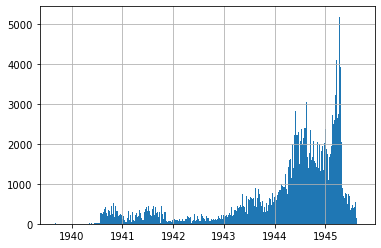

In [48]:
"""
df.plot.area
df.plot.barh
df.plot.density
df.plot.hist
df.plot.line
df.plot.scatter
df.plot.bar
df.plot.box
df.plot.hexbin
df.plot.kde
df.plot.pie
"""
df_total['MSNDATE'].hist(bins=300);

In [49]:
#df_total_dias.index.hist()

In [50]:
#df_total_45.iloc[-1000:].plot.bar(stacked=True);#<---Esto, en principio, es para hacer gráfica de barras, que se acumulan unas encima de otras

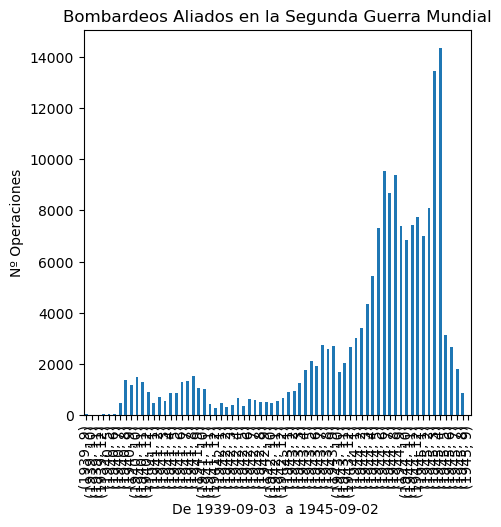

In [51]:
#plt.style.use('classic')
df_crono_total=df_crono(df_total_dias)

#df_crono_total.groupby([df_crono_total["MSNDATE"].dt.year, df_crono_total["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1939

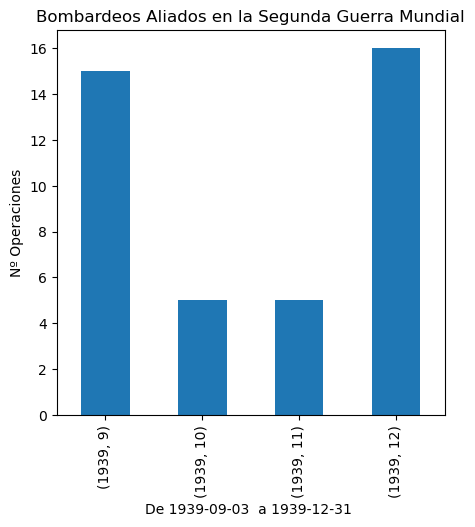

In [52]:
df_crono_39=df_crono(df_total_39)

#df_crono_39.groupby([df_crono_39["MSNDATE"].dt.year, df_crono_39["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1940

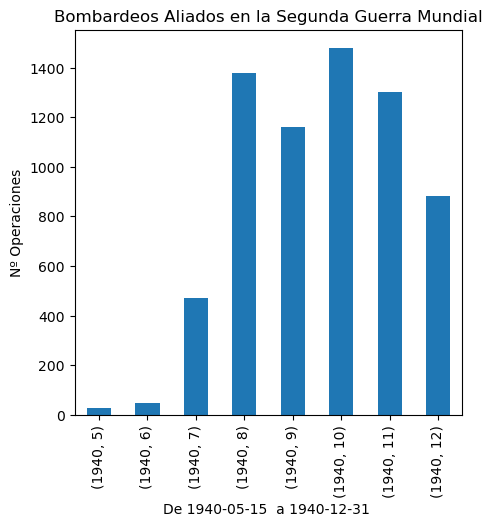

In [53]:
df_crono_40=df_crono(df_total_40)

#df_crono_40.groupby([df_crono_40["MSNDATE"].dt.year, df_crono_40["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1941

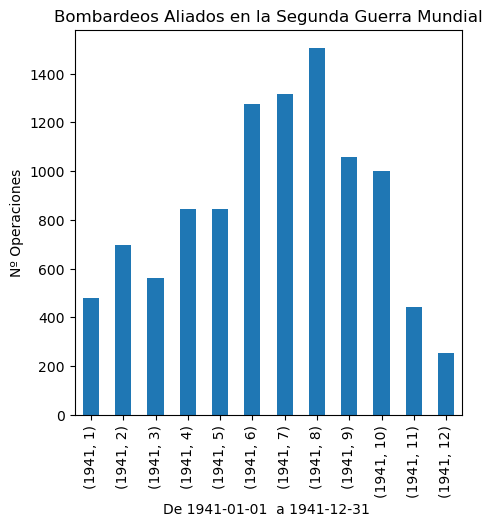

In [54]:
df_crono_41=df_crono(df_total_41)

#df_crono_41.groupby([df_crono_41["MSNDATE"].dt.year, df_crono_41["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1942

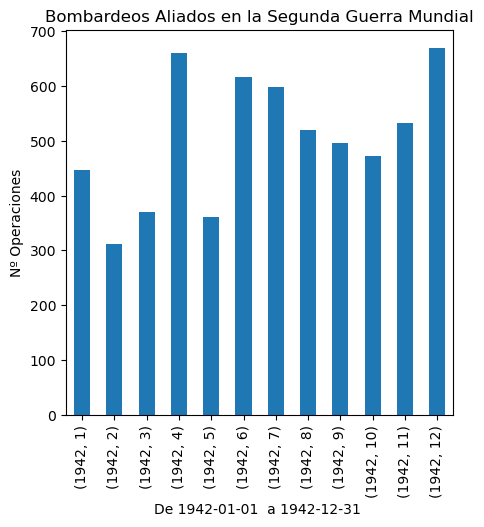

In [55]:
df_crono_42=df_crono(df_total_42)

#df_crono_42.groupby([df_crono_42["MSNDATE"].dt.year, df_crono_42["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1943

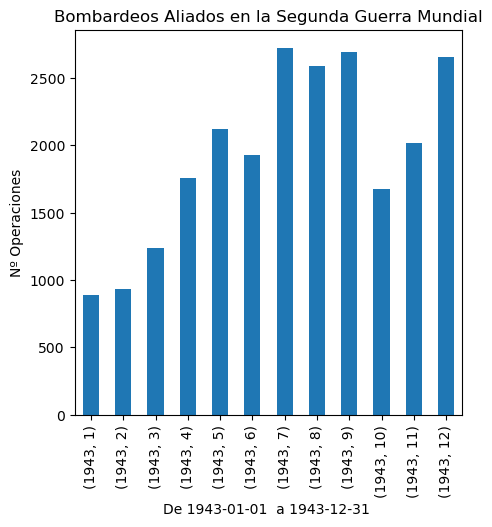

In [56]:
df_crono_43=df_crono(df_total_43)

#df_crono_43.groupby([df_crono_43["MSNDATE"].dt.year, df_crono_43["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1944

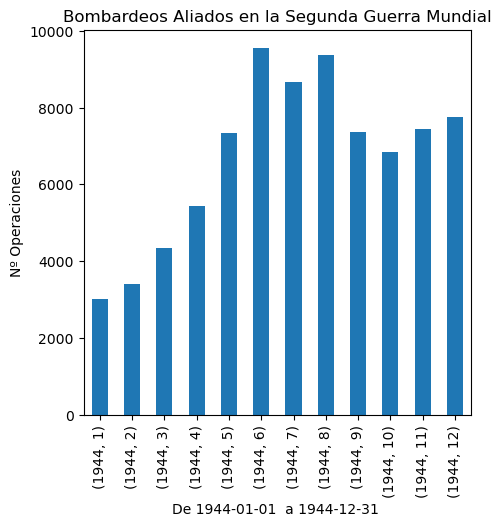

In [57]:
df_crono_44=df_crono(df_total_44)

#df_crono_44.groupby([df_crono_44["MSNDATE"].dt.year, df_crono_44["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1945

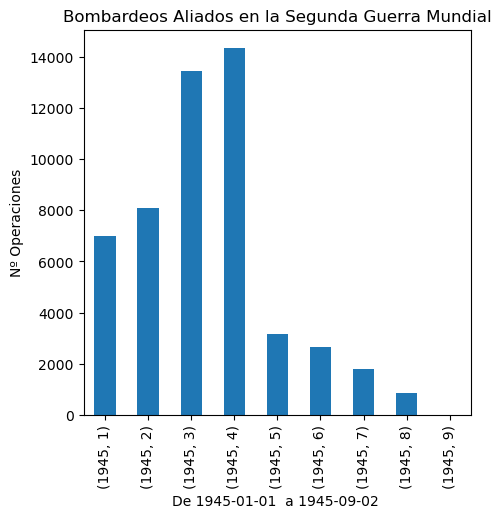

In [58]:
df_crono_45=df_crono(df_total_45)

#df_crono_45.groupby([df_crono_45["MSNDATE"].dt.year, df_crono_45["MSNDATE"].dt.month]).count().plot(kind="bar")

## >Fechas Destacadas

### Fechas Destacadas

#### Batalla de Francia (del 10 de mayo al 25 de junio de 1940)

In [59]:
df_total_Francia=fun_fechas(df_total_dias, "1940-05-15", "1940-06-25")
#df_total_Francia=df_total_40[:69]#<---15 de mayo a 25 de junio
df_total_Francia=df_total_inglaterra(df_total_Francia)
df_total_Francia

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,0.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN LOCATION,NaN,NaN,1.0,0.0,0.0,1.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,0.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,0.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,45.95,7.97,1.0,0.0,0.0,1.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,0.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,1.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940-06-25,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,0.0,NaN,NaN,NaN,NaN,BELGIUM,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
1940-06-25,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
1940-06-25,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,UNKNOWN LOCATION,NaN,NaN,1.0,0.0,0.0,1.0


#### Batalla de Inglaterra (del 10 de julio al 31 de octubre de 1940)

In [60]:
df_total_Inglaterra=fun_fechas(df_total_dias, "1940-07-10", "1940-10-31")
#df_total_Inglaterra=df_total_40[91:4550]#<---10 de julio a 31 de octubre
df_total_Inglaterra=df_total_inglaterra(df_total_Inglaterra)

df_total_Inglaterra

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1940-07-11,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,UNKNOWN LOCATION,NaN,NaN,2.0,0.0,0.0,2.0
1940-07-11,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
1940-07-13,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,47.33,14.50,1.0,0.0,0.0,1.0
1940-07-14,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,NaN,NaN,1.0,0.0,0.0,1.0
1940-07-15,MTO,GREAT BRITAIN,RAF,55/211,BLENHEIM,0.0,NaN,NaN,NaN,NaN,LIBYA,GAZALA,32.15,23.36,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940-10-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,1.0,0.0,0.0,1.0
1940-10-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,1.0,0.0,0.0,1.0
1940-10-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,0.0,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,1.0,0.0,0.0,1.0


#### Bombardeo de Colonia (del 30 al 31 de Mayo de 1942)

In [61]:
df_total_Colonia=fun_fechas(df_total_dias, "1942-05-30", "1942-05-31")
#df_total_Colonia=df_total_42[2096:2149]#<---30-31 de Mayo
df_total_Colonia=df_total_Colonia[df_total_Colonia["TGT_LOCATION"]=="COLOGNE"]

df_total_Colonia

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,142.0,0.0,0.0,142.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,20.0,0.0,0.0,20.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,10.0,0.0,0.0,10.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,12.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,38.0,0.0,0.0,38.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,0.0,12.0,0.0,12.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,41.0,0.0,0.0,41.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,84.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,132.0,104.0,0.0,236.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,5.0,14.0,0.0,19.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,1.0,0.0,0.0,1.0


#### Bombardeos de Hamburgo (del 24 de julio al 3 de agosto de 1943)

In [62]:
df_total_Hamburgo=fun_fechas(df_total_dias, "1943-07-24", "1943-08-03")
#df_total_Hamburgo=df_total_43[10908:11846]#<---del 24 de julio al 3 de agosto
df_total_Hamburgo=df_total_Hamburgo[df_total_Hamburgo["TGT_LOCATION"]=="HAMBURG"]
df_total_Hamburgo

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,0.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,72.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,44.0,0.0,0.0,44.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,68.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,18.0,29.0,0.0,47.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,519.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,394.0,643.0,0.0,518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943-08-02,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,276.0,0.0,0.0,276.0
1943-08-02,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,81.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,4.0,149.0,0.0,153.0
1943-08-02,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,0.0


#### Incidente de Charlie Brown y Franz Stigler (el 20 de diciembre de 1943)

In [63]:
df_total_Charlie=fun_fechas(df_total_dias, "1943-12-20")
df_total_Charlie=df_total_Charlie[df_total_Charlie["TGT_LOCATION"]=="BREMEN"]
fun_gps(df_total_Charlie)

#### Bombardeos de Wuhan (del 18 al 21 de diciembre de 1944)

In [64]:
df_total_Wuhan=fun_fechas(df_total_dias, "1944-12-18", "1944-12-21")
#df_total_Wuhan=df_total_44[-3888:-3237]#<---18-19 y 21 de diciembre de 1944

#Por algún motivo, la localización de Wuhan no está referida como "WUHAN", sino como "HANKOW", "HANKON", "HAINAN ISLAND", "WUCHUANG" y "WUCHANG". Esto se puede comprobar por las coordenadas.
A=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKOW"]
B=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKON"]
C=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HAINAN ISLAND"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHUANG"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHANG"]
df_total_Wuhan = A.append([B,C,D])

df_total_Wuhan=df_total_Wuhan.sort_values(by='MSNDATE')

df_total_Wuhan

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1944-12-18,CBI,USA,14 AF,374 BS,B24,6.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.60,114.333333,0.0,0.0,17.0,17.0
1944-12-18,CBI,USA,14 AF,373 BS,B24,8.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.60,114.333333,0.0,0.0,17.0,17.0
1944-12-18,CBI,USA,14 AF,491 BS,B25,10.0,NaN,NaN,NaN,NaN,CHINA,HAINAN ISLAND,30.60,114.333333,0.0,0.0,2.0,3.0
1944-12-19,CBI,USA,20 AF,40 BG,B29,1.0,NaN,NaN,NaN,NaN,CHINA,HANKOW,30.55,114.283333,1.0,1.0,0.0,2.0
1944-12-19,CBI,USA,20 AF,444 BG,B29,1.0,NaN,NaN,NaN,NaN,CHINA,HANKOW,30.55,114.283333,2.0,1.0,0.0,3.0
1944-12-21,CBI,USA,14 AF,75 FS,P51,1.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.60,114.333333,2.0,0.0,0.0,2.0


#### Bombardeos de Dresde (del 13 al 15 de febrero de 1945)

In [65]:
df_total_Dresden=fun_fechas(df_total_dias, "1945-02-13", "1945-02-15")
df_total_Dresden=df_total_Dresden[df_total_Dresden["TGT_LOCATION"]=="DRESDEN"]

#df_total_Dresden=df_total_45[df_total_45["TGT_LOCATION"]=="DRESDEN"]
#df_total_Dresden=df_total_Dresden[19:85]

fun_gps(df_total_Dresden)

#### Bombardeos de Tokio (el 9 de marzo de 1945)

In [66]:
df_total_Tokyo=fun_fechas(df_total_dias, "1945-03-09")
df_total_Tokyo=df_total_Tokyo[df_total_Tokyo["TGT_LOCATION"]=="TOKYO"]

#df_total_Tokyo=df_total_45[df_total_45["TGT_LOCATION"]=="TOKYO"]
#df_total_Tokyo=df_total_Tokyo[79:97]

df_total_Tokyo

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1945-03-09,PTO,USA,20 AF,9 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,23.0,0.0,23.0
1945-03-09,PTO,USA,20 AF,500 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,180.0,0.0,180.0
1945-03-09,PTO,USA,20 AF,499 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,240.0,0.0,240.0
1945-03-09,PTO,USA,20 AF,9 BG,B29,26.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,123.0,0.0,123.0
1945-03-09,PTO,USA,20 AF,29 BG,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,29.0,0.0,29.0
1945-03-09,PTO,USA,20 AF,505 BG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,12.0,0.0,12.0
1945-03-09,PTO,USA,20 AF,504 BG,B29,15.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,95.0,0.0,95.0
1945-03-09,PTO,USA,20 AF,19 BG,B29,25.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,117.0,0.0,117.0
1945-03-09,PTO,USA,20 AF,29 BG,B29,24.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,80.0,0.0,80.0


#### Bombardeos de Hiroshima y Nagasaki (del 6 y el 9 de agosto de 1945)

In [67]:
df_total_Hiroshima=fun_fechas(df_total_dias, "1945-08-06")
df_total_Hiroshima=df_total_Hiroshima[df_total_Hiroshima["TGT_LOCATION"]=="HIROSHIMA"]
#df_total_Hiroshima=df_total.iloc[-569]


df_total_Nagasaki=fun_fechas(df_total_dias, "1945-08-09")
df_total_Nagasaki=df_total_Nagasaki[df_total_Nagasaki["TGT_LOCATION"]=="NAGASAKI"]
#df_total_Nagasaki=df_total.iloc[-322]

df_total_Hiroshima
df_total_Nagasaki

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1945-08-09,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,NAGASAKI,32.733333,129.866667,20000.0,0.0,0.0,20000.0


## >Teatro de Operaciones más frecuente [X]

### Teatro de Operaciones más frecuentes, en Total

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='THEATER', ylabel='count'>

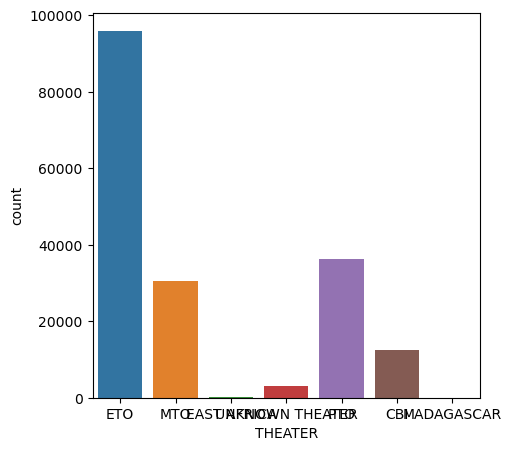

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(df_total_dias["THEATER"])

### Teatro de Operaciones más frecuente, según País Atacante, en Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

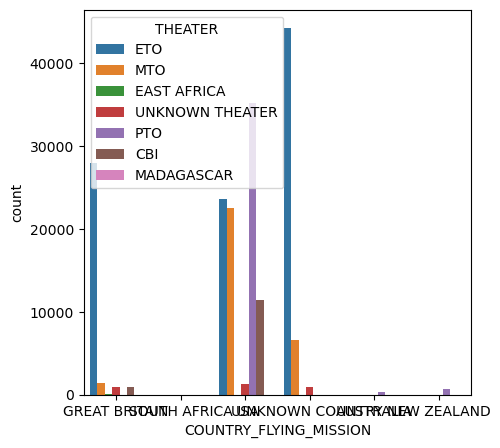

In [69]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=(df_total_dias))

### Teatro de Operaciones más frecuente, según País Atacante, en 1945

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

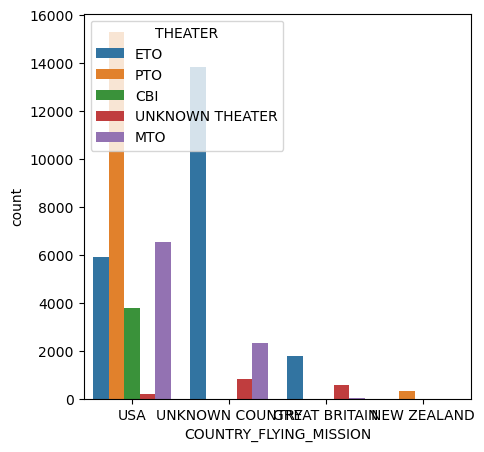

In [70]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_45)

### Teatro de Operaciones más frecente, según País Atacante, en Total, con ataques superiores a 100 y 800 de Daño Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

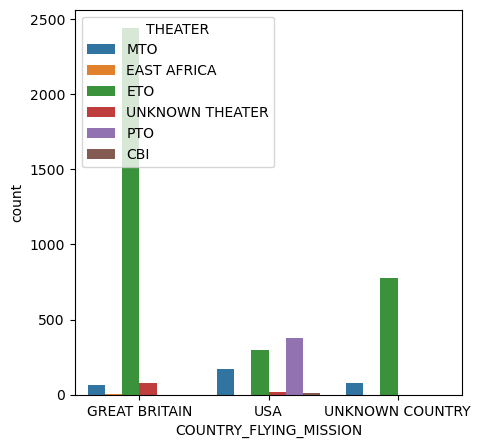

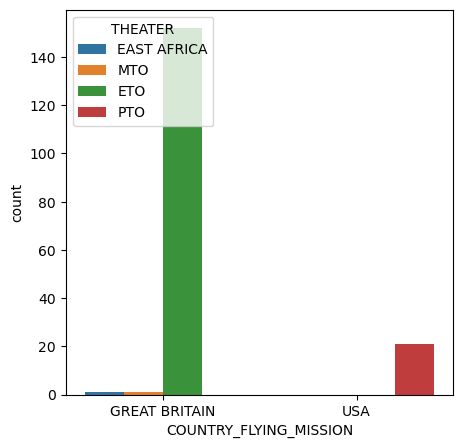

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_dias[df_total_dias["TOTAL_TONS"]>100])

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_dias[df_total_dias["TOTAL_TONS"]>800])

## >Modelos de Avión más frecuentes [casi perfecto]

### Modelos de Avión más frecuentes, en Total

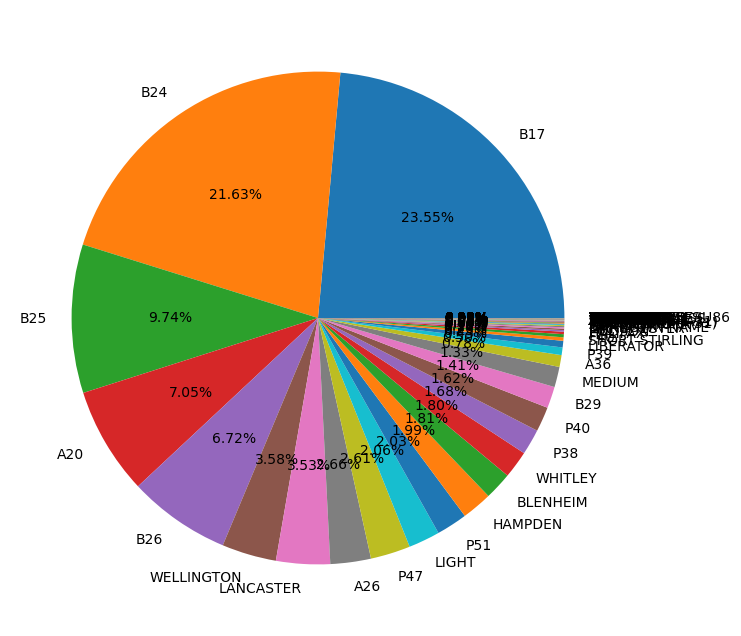

In [72]:
fun_modelos_avion(df_total_dias)

### Modelos de Avión más frecuentes, en Total, particularizando los 10 más frecuentes

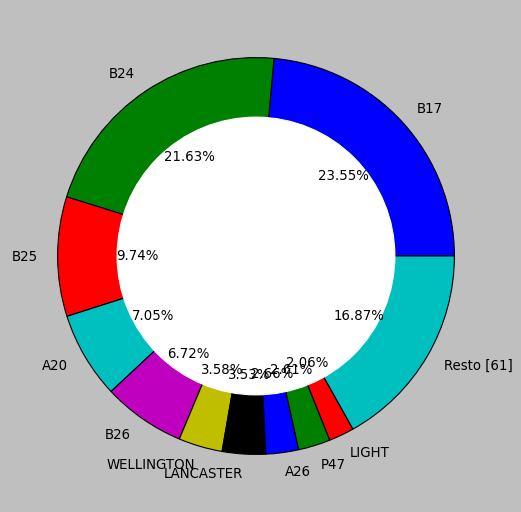

In [73]:
fun_modelos_avion(df_total_dias, top=10, circulo=True, style=1)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 400

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

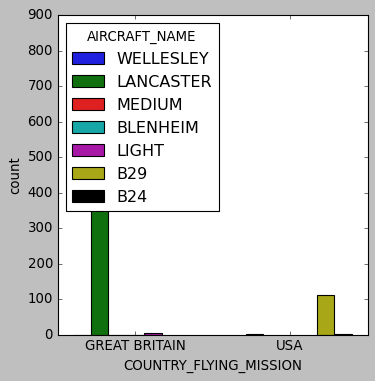

In [74]:
df_total_Tons_600=df_total_dias[df_total_dias["TOTAL_TONS"]>400]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 600

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

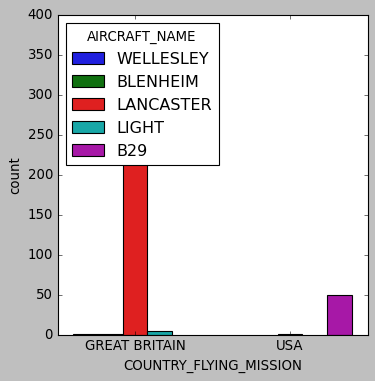

In [75]:
df_total_Tons_600=df_total_dias[df_total_dias["TOTAL_TONS"]>600]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 1000

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

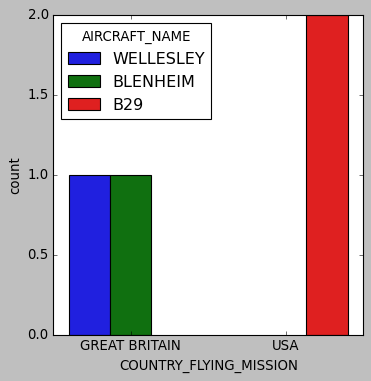

In [76]:
df_total_Tons_1000=df_total_dias[df_total_dias["TOTAL_TONS"]>1000]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_1000)

#### Modelos de Avión más utilizados por Inglaterra en la Batalla de Inglaterra

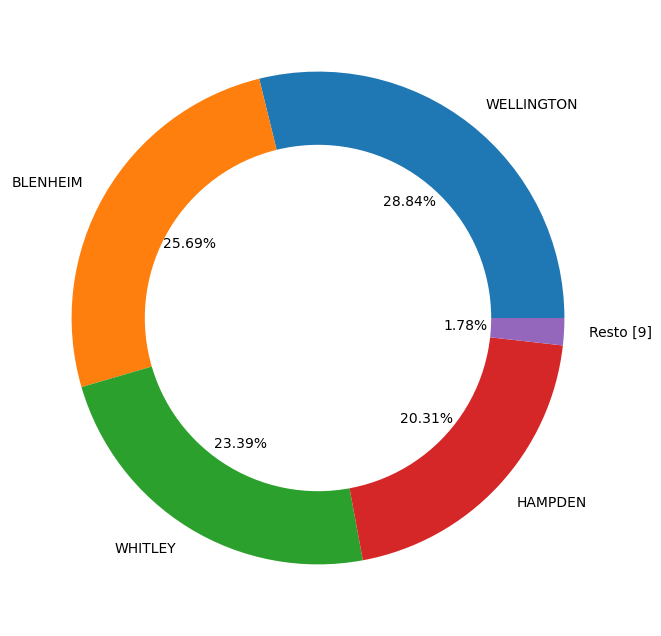

In [77]:
fun_modelos_avion(df_total_Inglaterra, top=4, circulo=True)

## >Destrucción Total

### +Destrucción Total a lo largo de toda la Guerra

<AxesSubplot:xlabel='MSNDATE'>

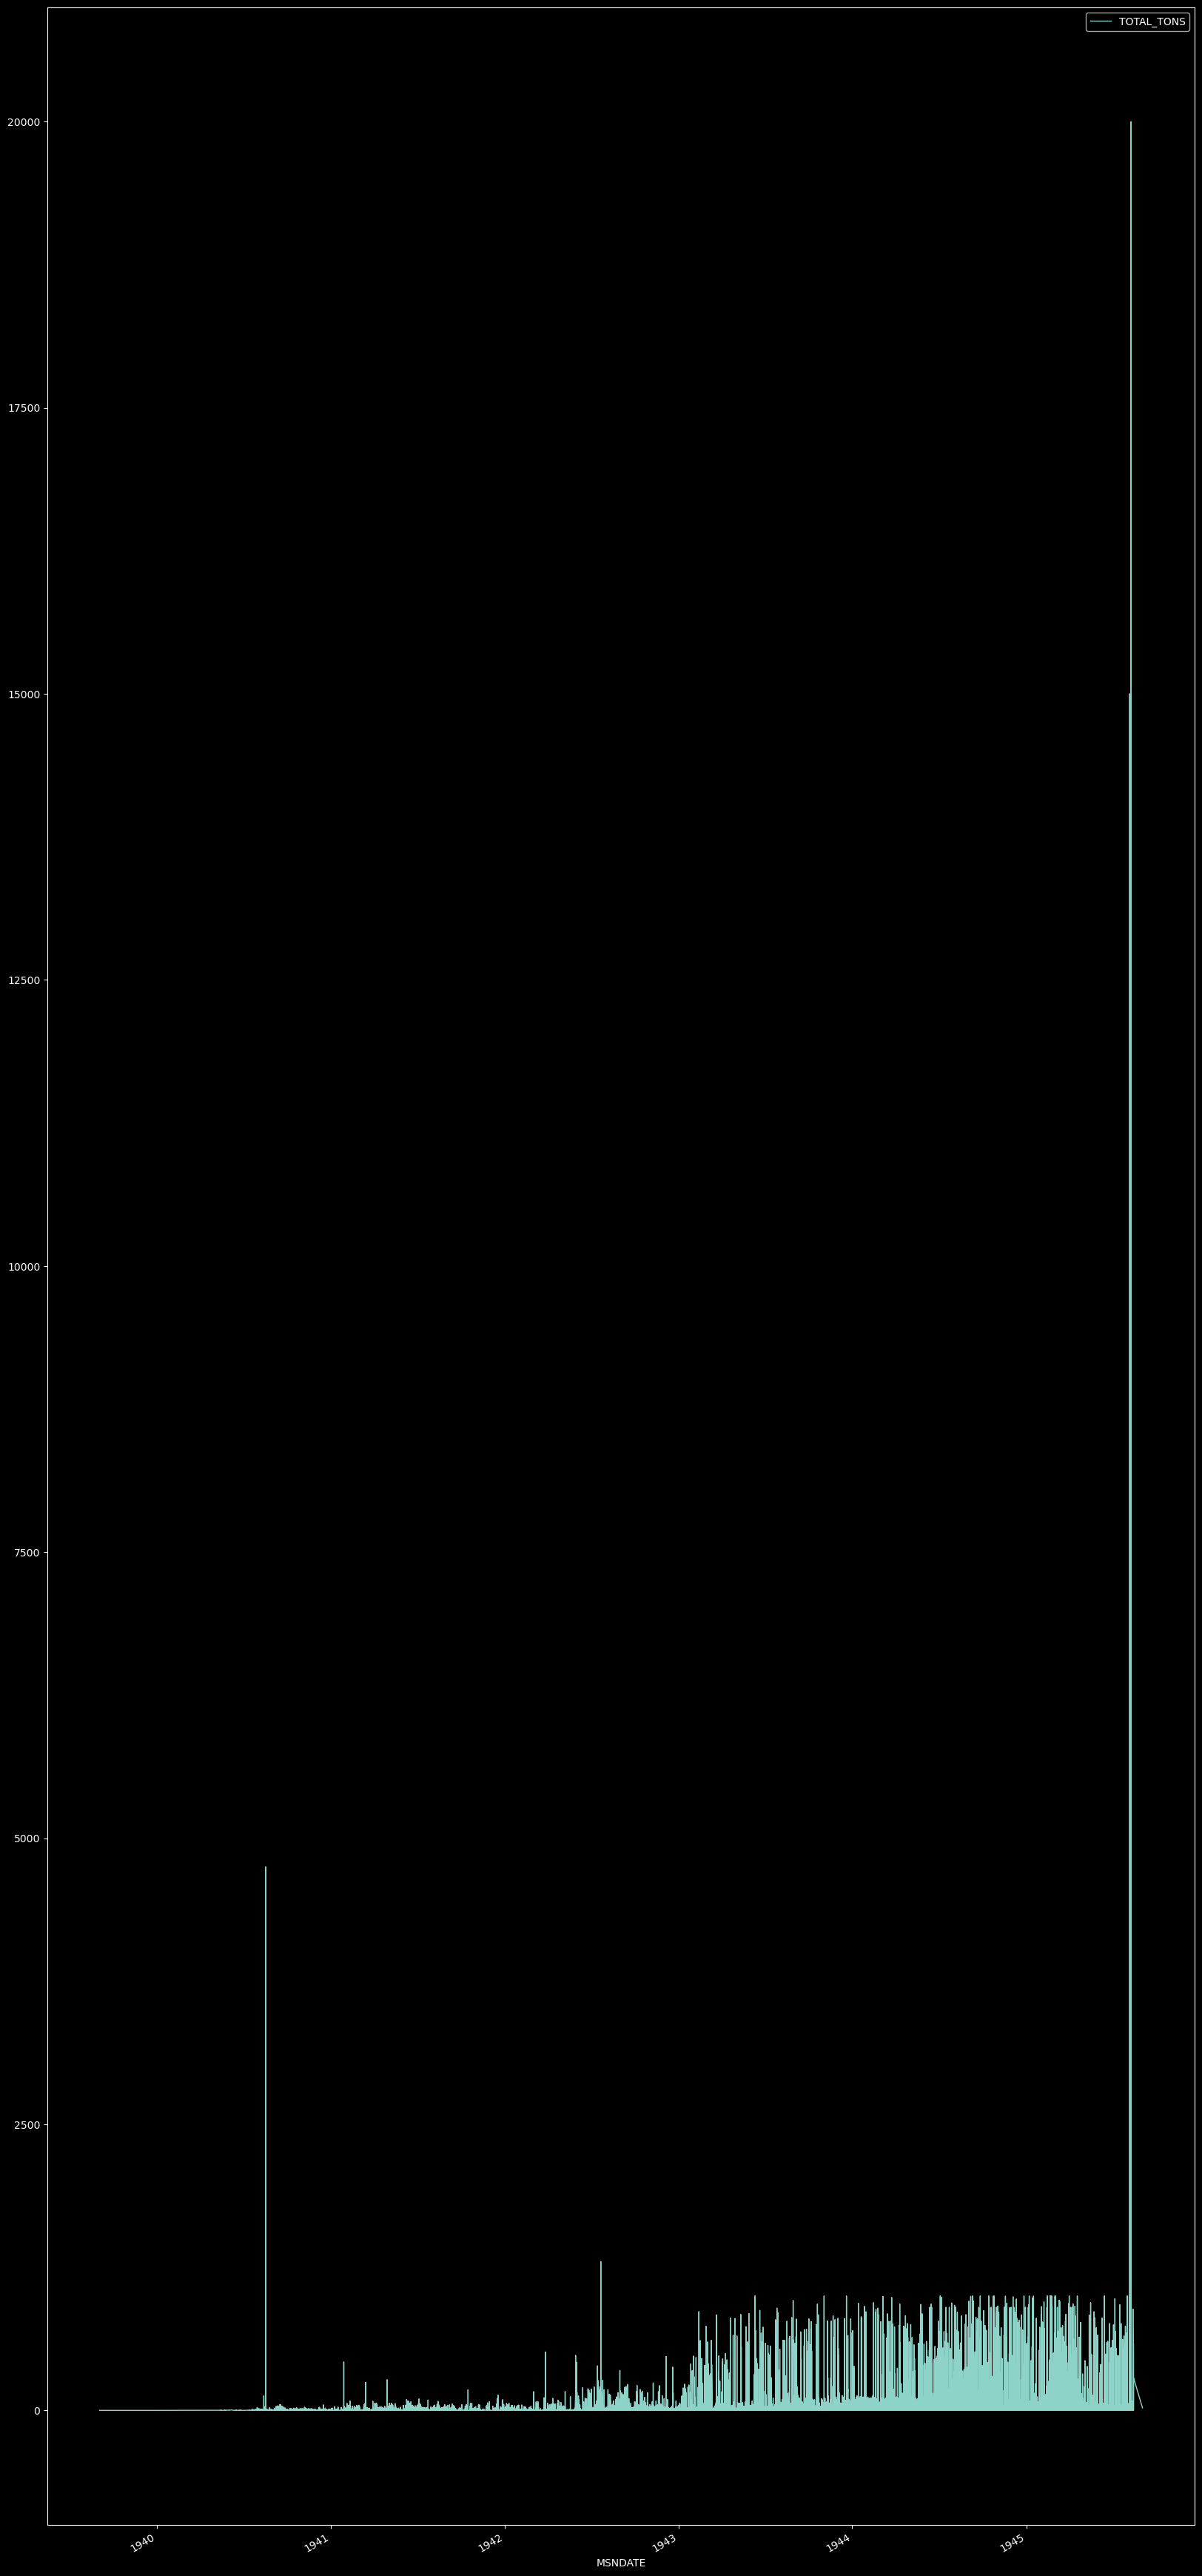

In [78]:
plt.style.use('dark_background')

df_total_dias.plot.line(y='TOTAL_TONS',figsize=(20,50),lw=1)

### Detonaciones superiores a 990 Tonelada de Drestrucción Total

35


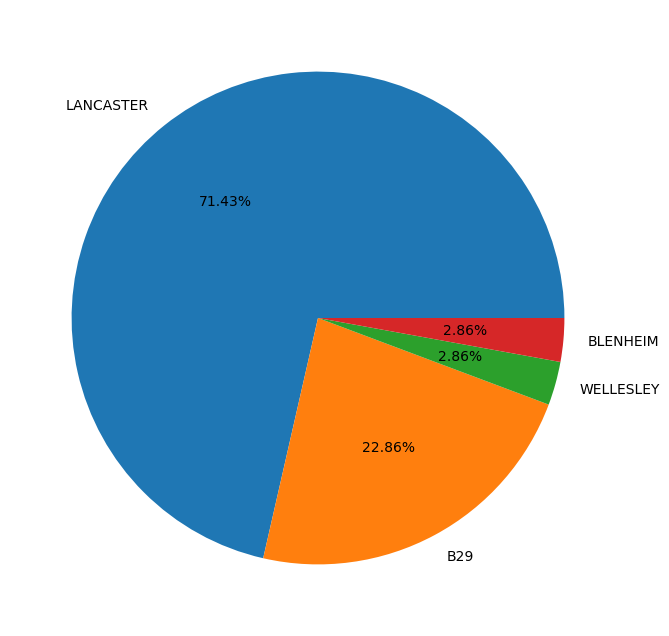

In [79]:
df_total_Tons_990=df_total_dias[df_total_dias["TOTAL_TONS"]>=990]
print (len(df_total_Tons_990))
fun_modelos_avion(df_total_Tons_990)

### Destrucción Total, en Total

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL_TONS', ylabel='count'>

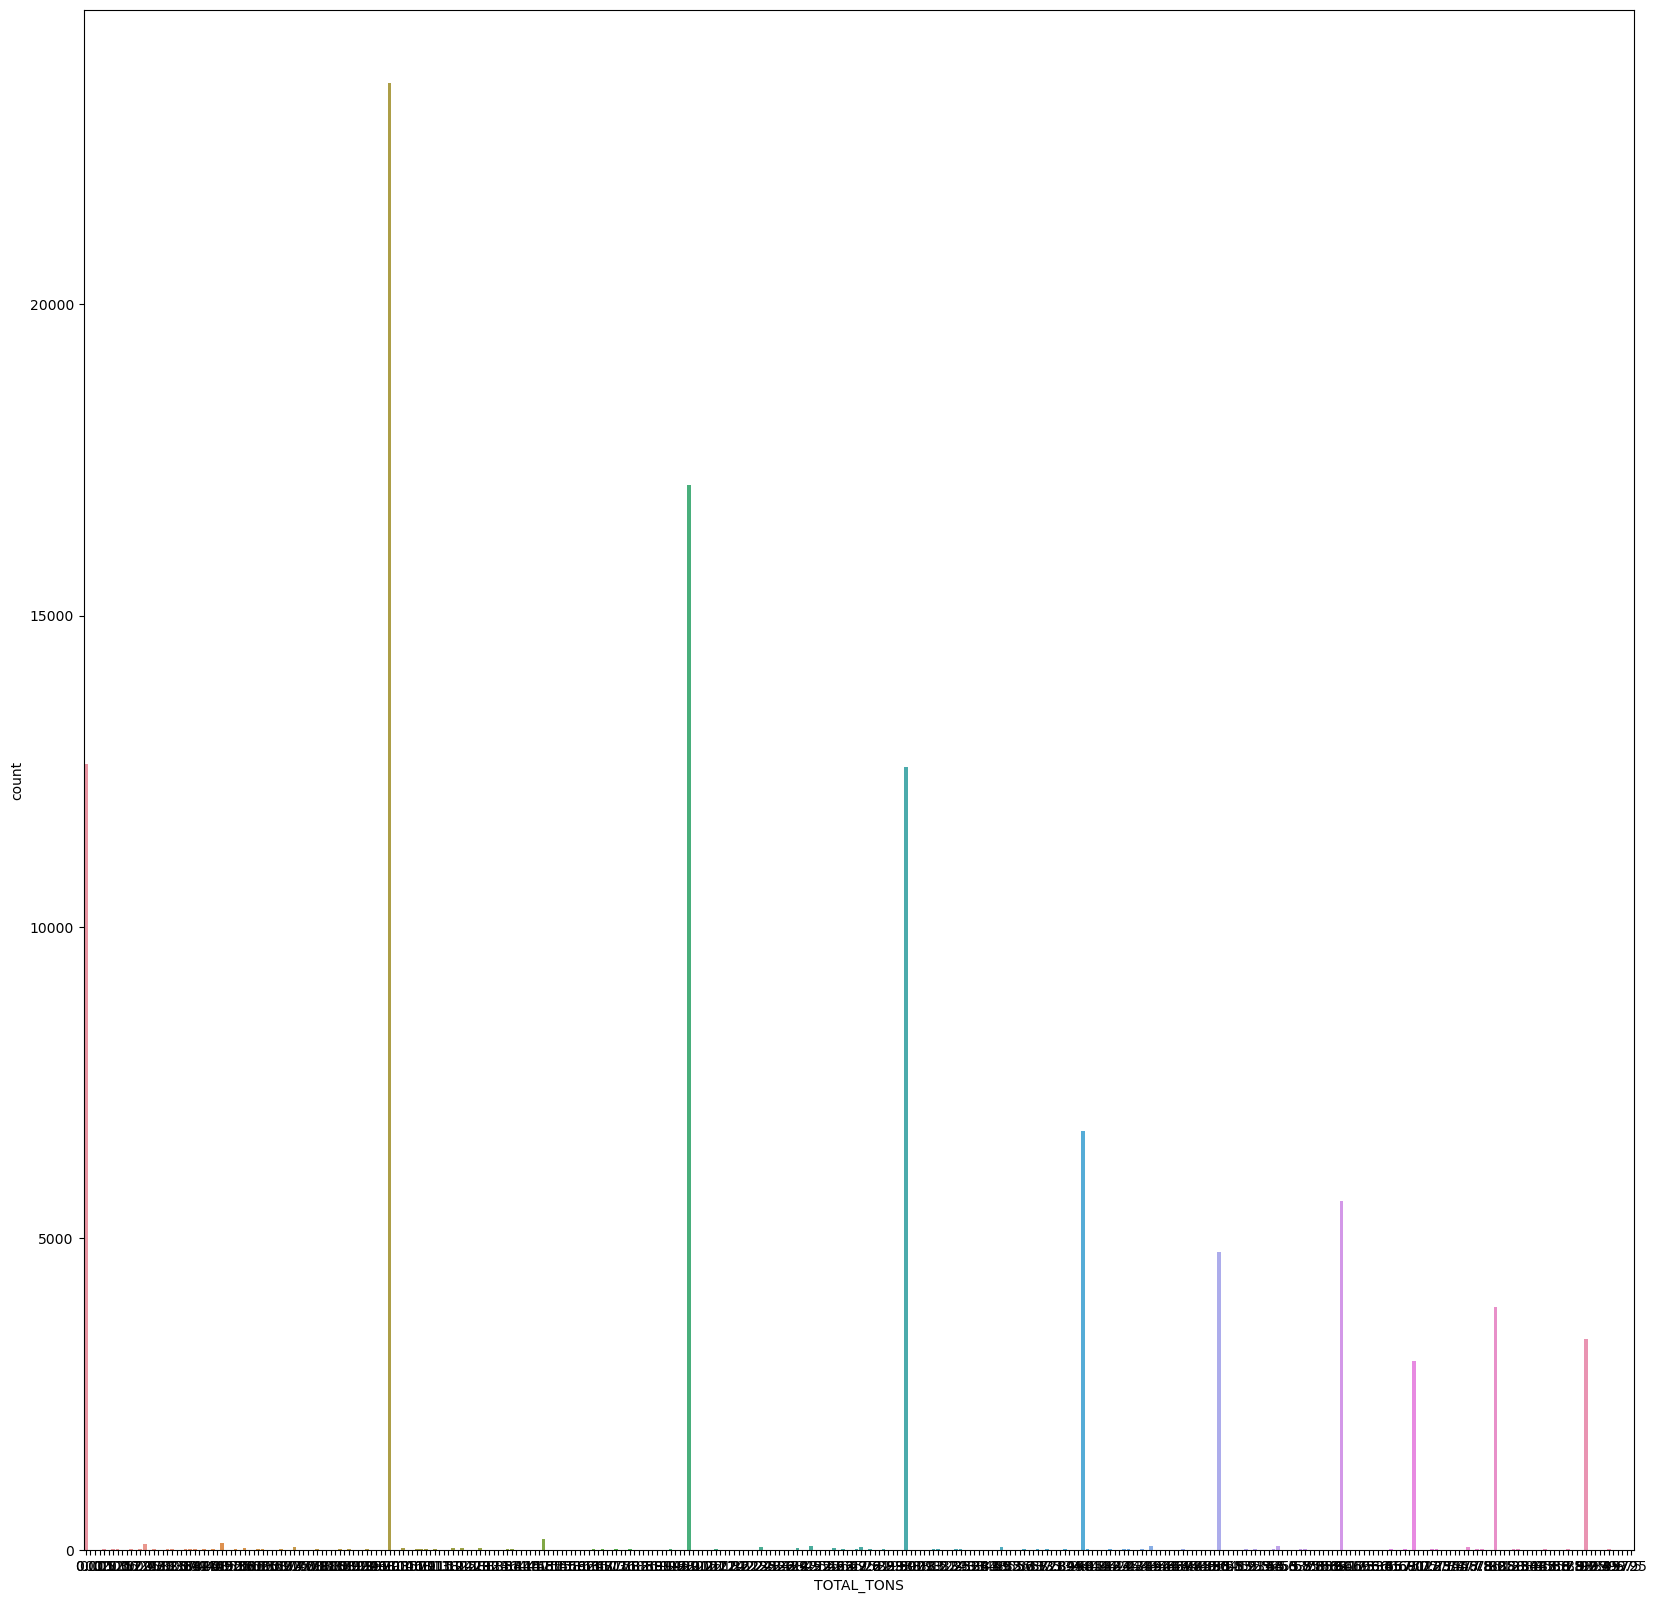

In [80]:
plt.figure(figsize=(20,20))

s=df_total_dias[df_total_dias["TOTAL_TONS"]<10]
#x=df_total["TOTAL_TONS"].value_counts()
sns.countplot(s["TOTAL_TONS"])

<AxesSubplot:ylabel='Density'>

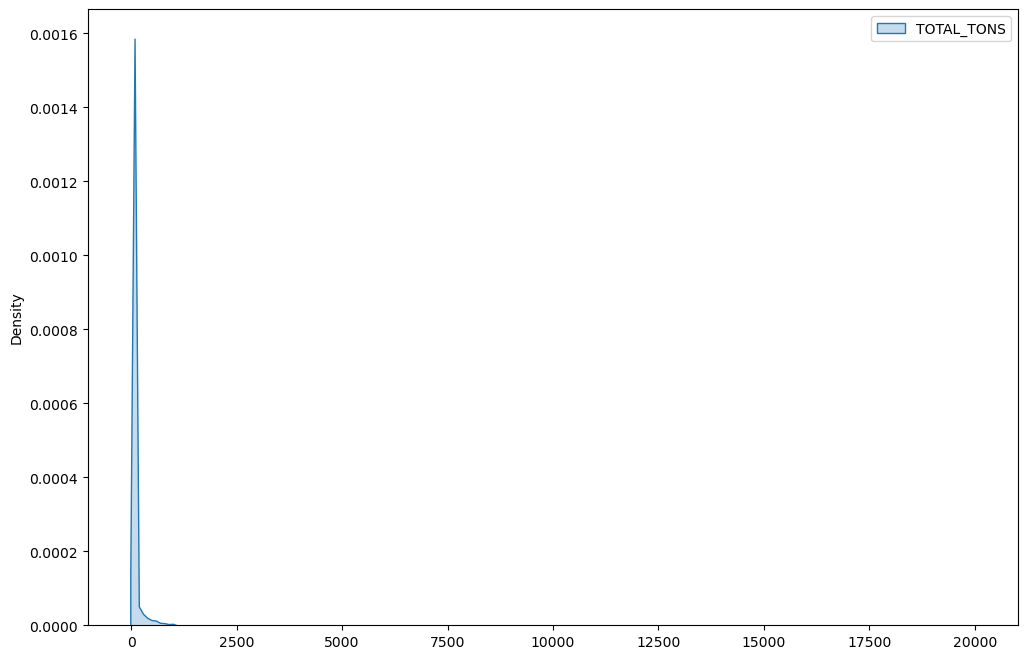

In [81]:
s=df_total.drop(['TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'COUNTRY_FLYING_MISSION',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'TGT_LATITUDE', 'TGT_LONGITUDE'], axis=1)

plt.figure(figsize=(12,8))
sns.kdeplot(data=s[s.columns.values], shade=True)

### Destrucción Total, en Total, según Países Atacados

In [82]:
# Obtener la sum() de TONS_TOTAL de cada país

### Media de la Destrucción Total (los 7 mayores), en Total, según los Modelos de Avión [1]

In [83]:
df_aviones_Tons_mean=df_total_dias.groupby(['AIRCRAFT_NAME']).mean()
df_aviones_Tons_mean=(df_aviones_Tons_mean.sort_values('TOTAL_TONS', ascending=False))[:7]
df_aviones_Tons_mean["TOTAL_TONS"]

AIRCRAFT_NAME
WELLESLEY    239.514000
LANCASTER    151.381232
B29           76.754249
LIBERATOR     49.266346
B26           29.809339
B17           29.735774
B24           25.015677
Name: TOTAL_TONS, dtype: float64

### Densidad de la Destrucción Total, en los B-17

<AxesSubplot:xlabel='TOTAL_TONS', ylabel='Density'>

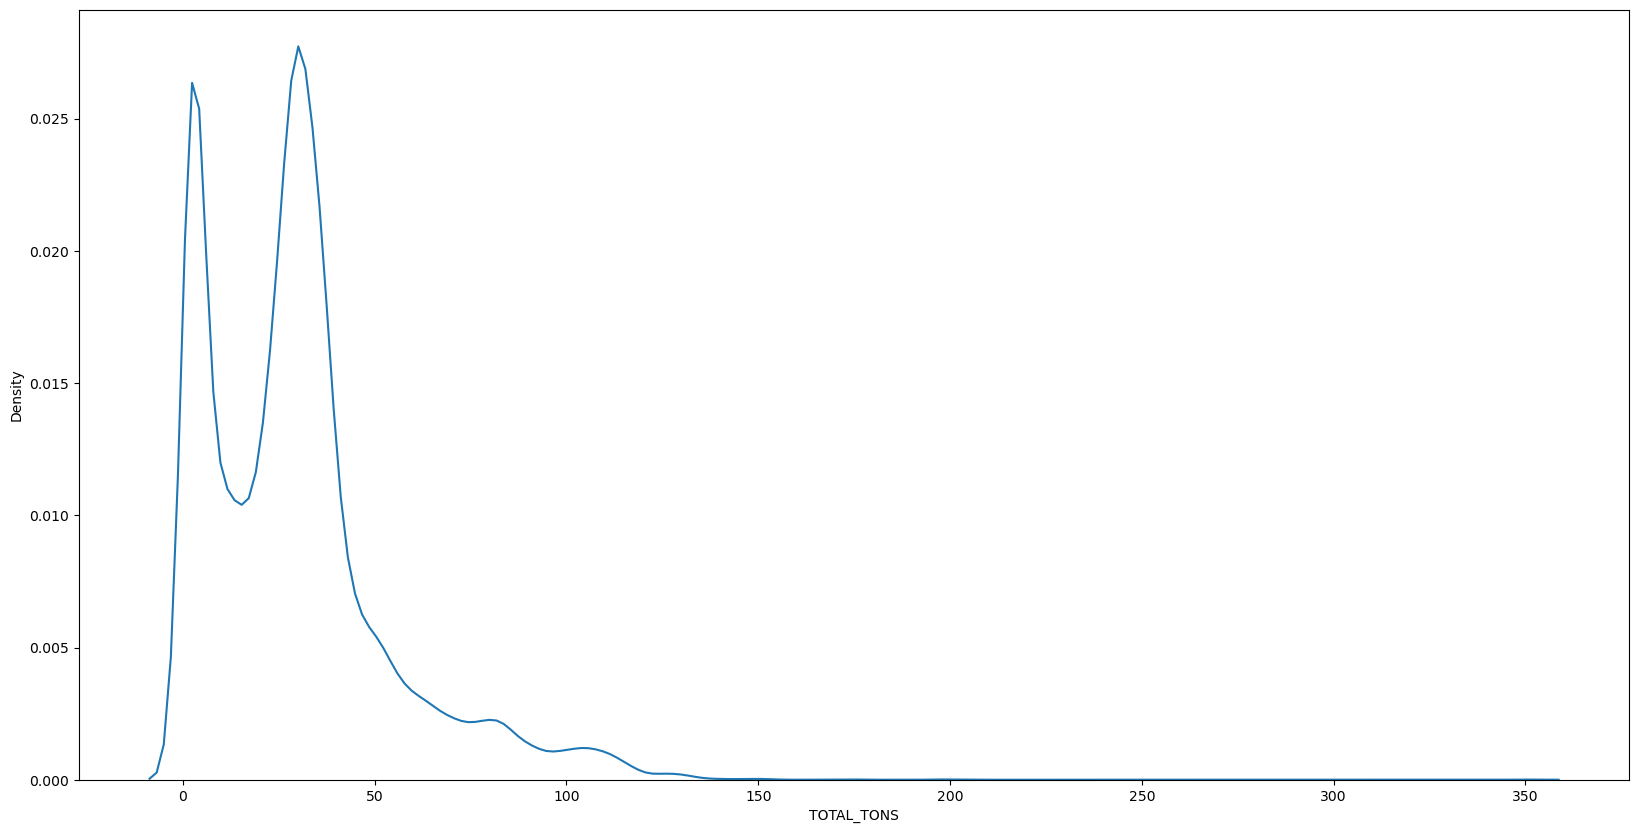

In [84]:
s=df_total[df_total["AIRCRAFT_NAME"]=="B17"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])

### Densidad de la Destrucción Total, en los B-29

<AxesSubplot:xlabel='TOTAL_TONS', ylabel='Density'>

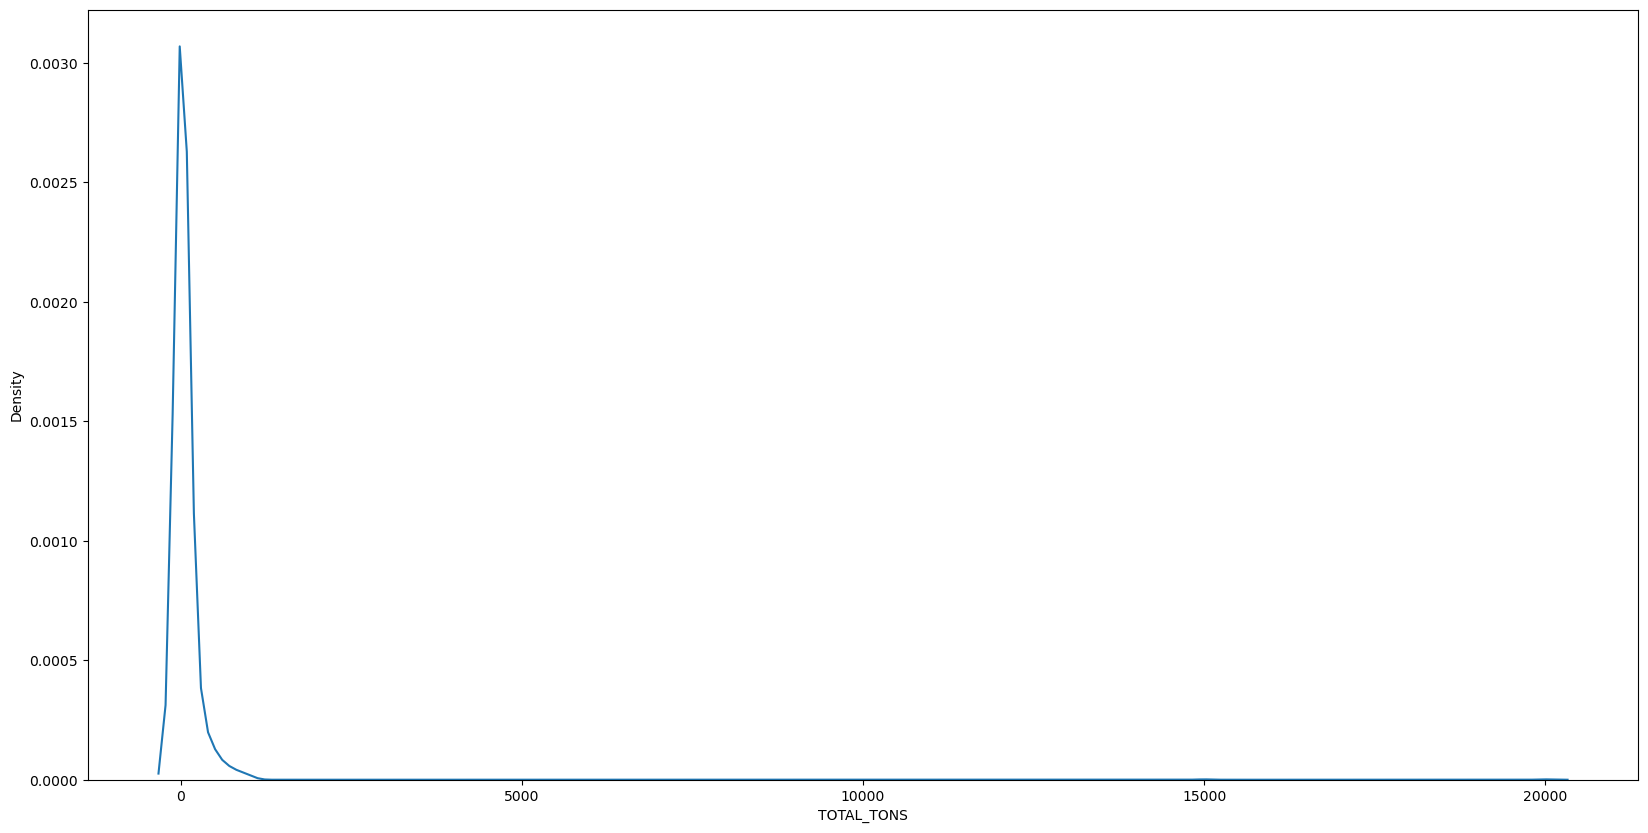

In [85]:
s=df_total[df_total["AIRCRAFT_NAME"]=="B29"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])

### Densidad de la Destrucción Total, en los WELLESLEY

<AxesSubplot:xlabel='TOTAL_TONS', ylabel='Density'>

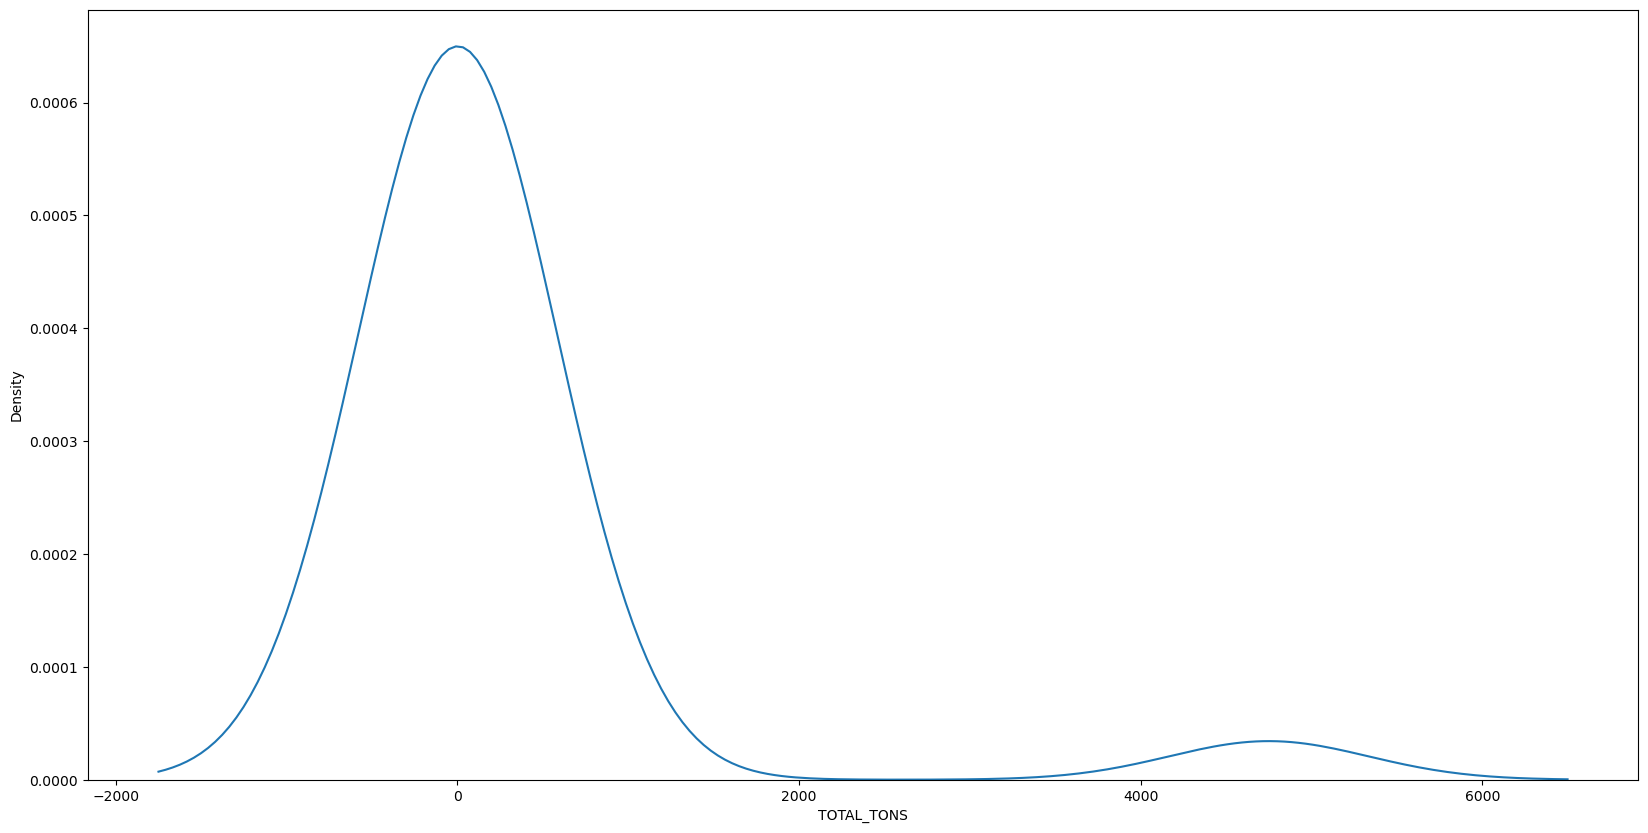

In [86]:
s=df_total[df_total["AIRCRAFT_NAME"]=="WELLESLEY"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])

In [87]:
c=df_total_45["AIRCRAFT_NAME"].value_counts()
m=c.index
lista=[]
for i in m:
    lista.append(i)
    print (i)
print(df_total_45["AIRCRAFT_NAME"].value_counts())
print (lista)

B24
B17
A20
A26
B25
B26
P51
P38
B29
P47
LANCASTER
LIGHT
F4U
P61
P40
LIBERATOR
PV-1 VENTURA
F06
B32
A36
P39
BLENHEIM
A24
B24             10647
B17             10045
A20              6572
A26              4679
B25              4059
B26              3841
P51              2483
P38              2198
B29              2170
P47              2158
LANCASTER        1051
LIGHT             695
F4U               257
P61               172
P40               151
LIBERATOR          57
PV-1 VENTURA       53
F06                47
B32                12
A36                 3
P39                 2
BLENHEIM            1
A24                 1
Name: AIRCRAFT_NAME, dtype: int64
['B24', 'B17', 'A20', 'A26', 'B25', 'B26', 'P51', 'P38', 'B29', 'P47', 'LANCASTER', 'LIGHT', 'F4U', 'P61', 'P40', 'LIBERATOR', 'PV-1 VENTURA', 'F06', 'B32', 'A36', 'P39', 'BLENHEIM', 'A24']


# OTROS

### +Número de combinaciones entre Reino Unido y los Países Atacados

<AxesSubplot:xlabel='TGT_COUNTRY,COUNTRY_FLYING_MISSION'>

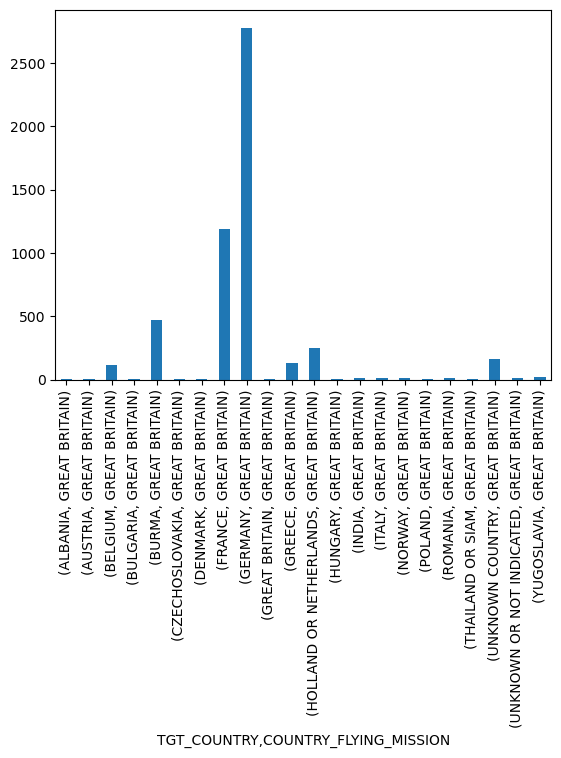

In [88]:
x=df_total_44[df_total_44["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]

groups = x.groupby(['TGT_COUNTRY','COUNTRY_FLYING_MISSION']).size()
groups.plot.bar()